# 20장. 신경망

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/machine-learning-with-python-cookbook/blob/master/20.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/machine-learning-with-python-cookbook/blob/master/20.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

**Note: 텐서플로에 포함된 tf.keras API를 사용하지 않고 멀티백엔드 케라스를 사용하려면 `from tensorflow.keras`를 `from keras`로 바꾸세요.**

## 20.1 신경망을 위한 데이터 전처리

In [1]:
# 라이브러리를 임포트합니다.
from sklearn import preprocessing
import numpy as np

# 특성을 만듭니다.
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# 스케일링 객체를 만듭니다.
scaler = preprocessing.StandardScaler()

# 특성을 변환합니다.
features_standardized = scaler.fit_transform(features)

# 특성을 확인합니다.
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [2]:
# 평균과 표준 편차를 출력합니다.
print("평균:", round(features_standardized[:,0].mean()))
print("표준 편차:", features_standardized[:,0].std())

평균: 0.0
표준 편차: 0.9999999999999999


## 20.2 신경망 구성하기

In [3]:
# 라이브러리를 임포트합니다.
from tensorflow.keras import models
from tensorflow.keras import layers

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

### 붙임

In [4]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 입력에서부터 출력까지 세 개의 완전 연결 층을 연결합니다.
x = layers.Input(shape=(10,))
h1 = layers.Dense(units=16, activation="relu")(x)
h2 = layers.Dense(units=16, activation="relu")(h1)
y = layers.Dense(units=1, activation="sigmoid")(h2)

# 신경망 모델을 만듭니다.
network = models.Model(x, y)
# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

In [6]:
network.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [7]:
dense = layers.Dense(units=16, activation="relu")
h1 = dense(x)

## 20.3 이진 분류기 훈련하기

In [8]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8121 - val_loss: 0.3317 - val_accuracy: 0.8606
Epoch 2/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.8646 - val_loss: 0.3254 - val_accuracy: 0.8620
Epoch 3/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.8684 - val_loss: 0.3258 - val_accuracy: 0.8608


In [9]:
# 특성 행렬의 크기를 확입니다.
features_train.shape

(25000, 1000)

### 붙임

In [10]:
# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop") # 옵티마이저

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3101 - val_loss: 0.3580
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3010 - val_loss: 0.3267
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.2914 - val_loss: 0.3295


In [11]:
network.evaluate(features_test, target_test)

782/782 [==============================] - 1s 877us/step - loss: 0.3295


0.3295154571533203

## 20.4 다중 분류기 훈련하기

In [12]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import reuters
# 멀티백엔드 케라스를 사용하는 경우 다음 코드를 사용하세요
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 5000

# 특성과 타깃 데이터를 로드합니다.
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# 특성 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 타깃 벡터를 원-핫 인코딩하여 타깃 행렬을 만듭니다.
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=100,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=100, activation="relu"))

# 소프트맥스 활성화 함수를 사용하는 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=46, activation="softmax"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="categorical_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=3, # 3 에포크
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

In [13]:
# 타깃 행렬을 확인합니다.
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 20.5 회귀 모델 훈련하기

In [14]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=32, activation="relu"))

# 활성화 함수가 없는 완전 연결층을 추가합니다.
network.add(layers.Dense(units=1))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="mse", # 평균 제곱 오차
                optimizer="RMSprop", # 옵티마이저
                metrics=["mse"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=10, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

## 20.6 예측 만들기

In [15]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 10000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 테스트 세트의 클래스를 예측합니다.
predicted_target = network.predict(features_test)

In [16]:
# 첫 번째 샘플이 클래스 1이 될 확률을 확인합니다.
predicted_target[0]

array([0.0897276], dtype=float32)

## 20.7 훈련 기록 시각화하기

In [17]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

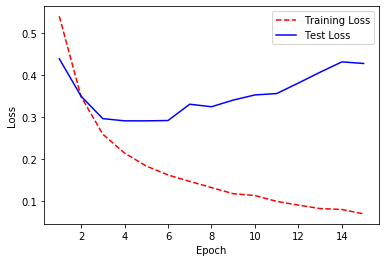

In [18]:
# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 10000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_loss) + 1)

# 손실 값의 기록을 시각화합니다.
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

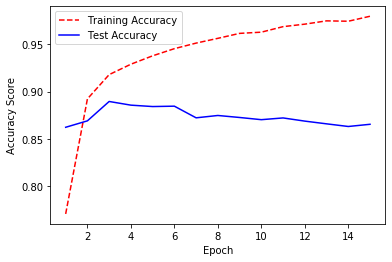

In [19]:
# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## 20.8 가중치 규제로 과대적합 줄이기

In [20]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

### 붙임

In [21]:
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer='l1_l2',
                         input_shape=(number_of_features,)))

## 20.9 조기종료로 과대적합 줄이기

In [22]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정합니다.
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=20, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=0, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

## 20.10 드롭아웃으로 과대적합 줄이기

In [23]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 입력층으로 드롭아웃 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

## 20.11 모델 훈련 진행 과정을 저장하기

In [24]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정합니다.
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      callbacks=checkpoint, # 체크포인트
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

## 20.12 신경망을 k-폴드 교차검증하기

In [25]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 특성 개수
number_of_features = 100

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# 설정 완료된 신경망을 반환하는 함수를 만듭니다.
def create_network():

    # 신경망 모델을 만듭니다.
    network = models.Sequential()

    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
        number_of_features,)))

    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=16, activation="relu"))

    # 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 신경망의 모델 설정을 완료합니다.
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer="rmsprop", # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표

    # 설정 완료된 모델을 반환합니다.
    return network

# 케라스 모델을 래핑하여 사이킷런에서 사용할 수 있도록 만듭니다.
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

# 3-폴드 교차검증을 사용하여 신경망을 평가합니다.
cross_val_score(neural_network, features, target, cv=3)

array([0.88632274, 0.9030903 , 0.88118809])

## 20.13 신경망 튜닝

In [26]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 특성 개수
number_of_features = 100

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# 설정 완료된 신경망을 반환하는 함수를 만듭니다.
def create_network(optimizer="rmsprop"):

    # 신경망 모델을 만듭니다.
    network = models.Sequential()

    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=16,
                             activation="relu",
                             input_shape=(number_of_features,)))

    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=16, activation="relu"))

    # 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 신경망의 모델 설정을 완료합니다.
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표

    # 설정 완료된 모델을 반환합니다.
    return network

# 사이킷런에서 사용할 수 있도록 케라스 모델을 감쌉니다.
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# 하이퍼파라미터 탐색 영역을 정의합니다.
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# 하이퍼파라미터 그리드를 만듭니다.
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# 그리드 서치를 만듭니다.
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# 그리드 서치를 수행합니다.
grid_result = grid.fit(features, target)

In [27]:
# 최상의 신경망 하이퍼파라미터를 확인합니다.
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

## 20.14 신경망 시각화하기

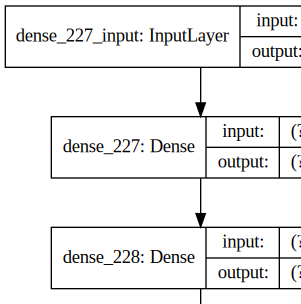

In [28]:
# 라이브러리를 임포트합니다.
from tensorflow.keras import models
from tensorflow.keras import layers
from IPython.display import SVG
# 멀티백엔드 케라스를 사용하는 경우 다음 코드를 사용하세요
# from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 구조를 그립니다.
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

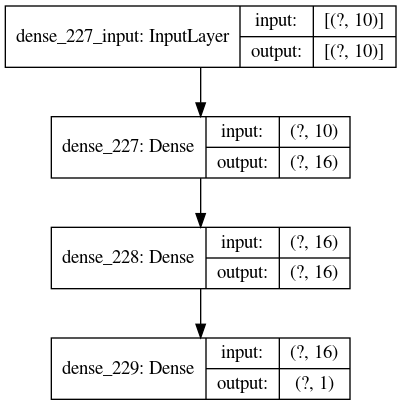

In [29]:
# 신경망 구조를 시각화한 그림를 파일로 저장합니다.
plot_model(network, show_shapes=True, to_file="network.png")

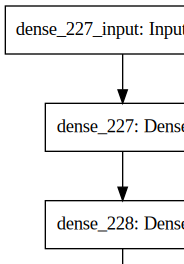

In [30]:
# 신경망 구조를 그립니다.
SVG(model_to_dot(network, show_shapes=False).create(prog="dot", format="svg"))

## 20.15 이미지 분류하기

In [31]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
# 멀티백엔드 케라스를 사용하는 경우 다음 코드를 사용하세요
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# 멀티백엔드 케라스를 사용하는 경우 다음 코드를 사용하세요
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

# 컬러 채널이 처음에 오도록 설정합니다.
K.set_image_data_format("channels_first")

# 랜덤 시드를 지정합니다.
np.random.seed(0)

# 이미지 정보를 설정합니다.
channels = 1
height = 28
width = 28

# MNIST 데이터에서 훈련 데이터와 타깃 데이터를 로드합니다.
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# 훈련 이미지 데이터를 특성의 크기로 바꿉니다.
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# 테스트 이미지 데이터를 특성의 크기로 바꿉니다.
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# 0과 1사이로 픽셀 강도의 스케일을 조정합니다.
features_train = data_train / 255
features_test = data_test / 255

# 타깃 데이터를 원-핫 인코딩합니다.
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)
number_of_classes = target_test.shape[1]

# 신경망 모델을 만듭니다.
network = Sequential()

# 64 필터, 5x5 윈도, 렐루 활성화 함수를 사용하는 합성곱 층을 추가합니다.
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# 2x2 윈도를 사용하는 최대 풀링 층을 추가합니다.
network.add(MaxPooling2D(pool_size=(2, 2)))

# 드롭아웃 층을 추가합니다.
network.add(Dropout(0.5))

# 입력을 일렬로 펼치기 위한 층을 추가합니다.
network.add(Flatten())

# 렐루 활성화 함수를 사용한 128개 유닛의 완전 연결 층을 추가합니다.
network.add(Dense(128, activation="relu"))

# 드롭아웃 층을 추가합니다.
network.add(Dropout(0.5))

# 소프트맥스 활성화 함수를 사용하는 완전 연결 층을 추가합니다.
network.add(Dense(number_of_classes, activation="softmax"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="categorical_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
network.fit(features_train, # 특성
            target_train, # 타깃
            epochs=2, # 에포크 횟수
            verbose=0, # 출력 없음
            batch_size=1000, # 배치의 샘플 개수
            validation_data=(features_test, target_test)) # 검증 데이터

### 붙임

In [32]:
network.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_230 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_231 (Dense)            (None, 10)              

## 20.16 이미지 증식으로 성능 향상하기

In [33]:
# 코랩에서 실행하는 경우 다음 주석을 제거하고 실행하세요.
#!wget -O raw_images.tar.gz http://bit.ly/2XPbBsE
#!tar -xvzf raw_images.tar.gz

In [34]:
# 라이브러리를 임포트합니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 증식을 위해 객체를 만듭니다.
augmentation = ImageDataGenerator(featurewise_center=True, # ZCA 화이트닝(whitening)을 적용합니다.
                                  zoom_range=0.3, # 이미지를 랜덤하게 확대합니다.
                                  width_shift_range=0.2, # 이미지를 랜덤하게 이동합니다.
                                  horizontal_flip=True, # 이미지를 랜덤하게 뒤집습니다.
                                  rotation_range=90) # 랜덤하게 회전합니다.

# 'raw/images' 디렉토리에 있는 모든 이미지에 적용합니다.
augment_images = augmentation.flow_from_directory("raw/images", # Image folder
                                                  batch_size=32, # 배치 크기
                                                  class_mode="binary", # 클래스
                                                  save_to_dir="processed/images")

Found 12665 images belonging to 2 classes.


```python
# 신경망을 훈련합니다.
network.fit_generator(augment_images,
                      # 에포크마다 제너레이터를 호출할 횟수
                      steps_per_epoch=2000,
                      # 에포크 횟수
                      epochs=5,
                      # 테스트 데이터 제너레이터
                      validation_data=augment_images_test,
                      # 테스트 에포크마다 제너레이터를 호출할 횟수
                      validation_steps=800)
```

## 20.17 텍스트 분류하기

In [35]:
# 20.15절에서 설정한 컬러 채널 위치를 복원합니다.
# 책에는 이 코드가 없습니다.
K.set_image_data_format("channels_last")

In [36]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 각 샘플이 400개의 특성을 가지도록 패딩하거나 잘라냅니다.
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 임베딩(embedding) 층을 추가합니다.
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# 128개의 유닛을 가진 LSTM 층을 추가합니다.
network.add(layers.LSTM(units=128))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="Adam", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

In [37]:
# 처음 샘플을 확인합니다.
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [38]:
# 처음 샘플을 확인합니다.
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

### 붙임

In [39]:
# 신경망 모델을 만듭니다.
network = models.Sequential()

# 임베딩(embedding) 층을 추가합니다.
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# 128개의 유닛을 가진 GRU 층을 추가합니다.
network.add(layers.GRU(units=128))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="Adam", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터